In [1355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [1356]:
train=pd.read_csv("train.csv")
test=pd.read_csv("train.csv")

In [1357]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1358]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


  ##EDA-Exploratory Data Analysis

In [1360]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1361]:
 train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1362]:
 train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1363]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1364]:
train[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean()

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Sex,Survived
0,female,0.742038
1,male,0.188908


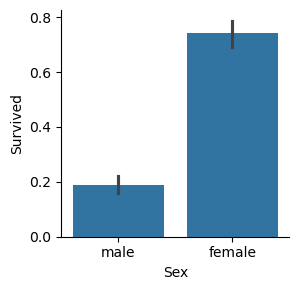

In [1365]:
sns.catplot(x="Sex",y="Survived",data=train,kind="bar",height=3)

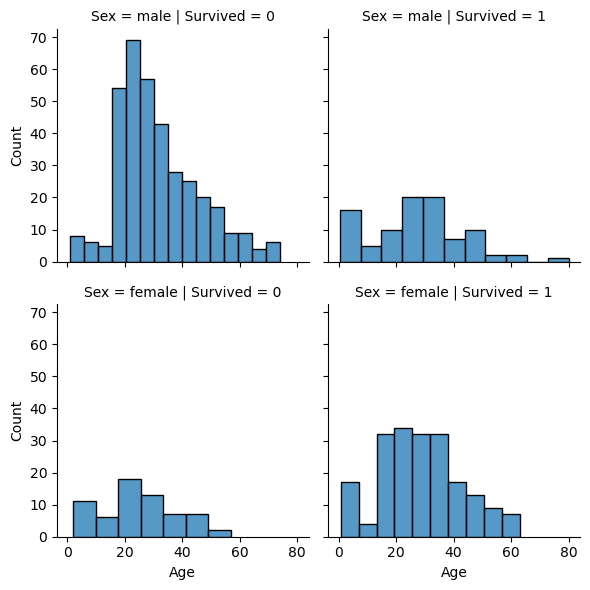

In [1366]:
sns.FacetGrid(train,col="Survived",row="Sex").map(sns.histplot,"Age")

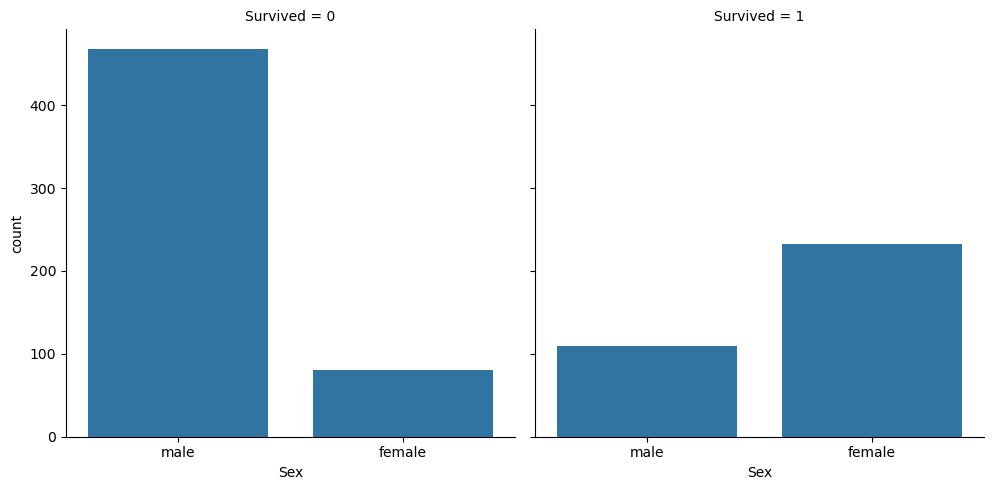

In [1367]:
sns.catplot(x="Sex",col="Survived",kind="count",data=train)

<Axes: xlabel='Sex', ylabel='count'>

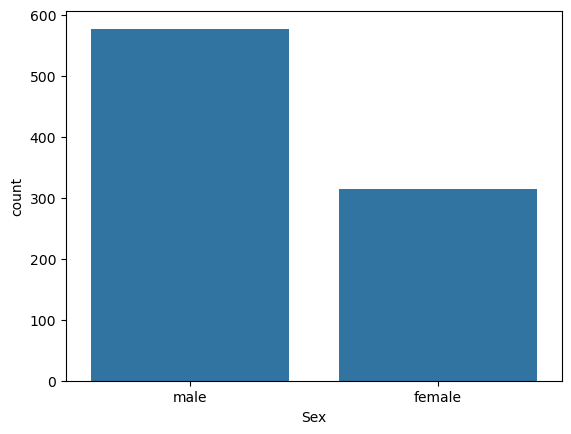

In [1368]:
sns.countplot(x="Sex",data=train)

In [1369]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


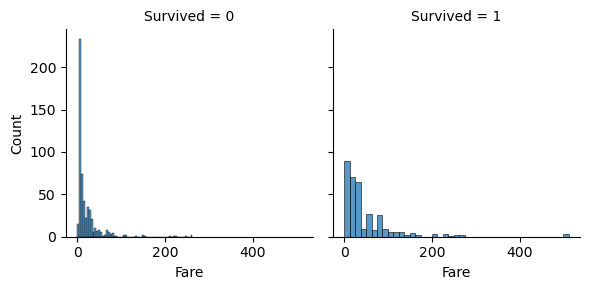

In [1370]:
sns.FacetGrid(train,col="Survived").map(sns.histplot,"Fare")

<Axes: xlabel='Age', ylabel='Fare'>

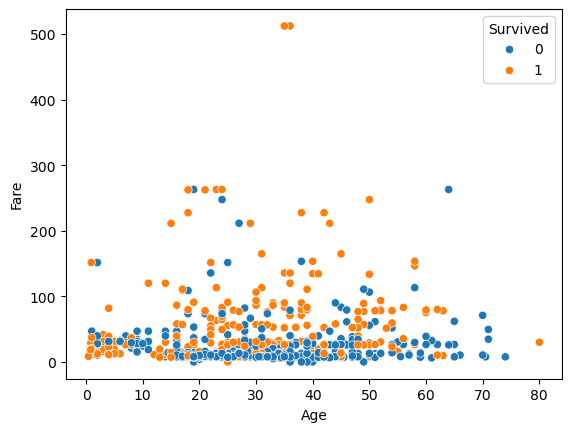

In [1371]:
sns.scatterplot(x="Age",y="Fare",hue="Survived",data=train)

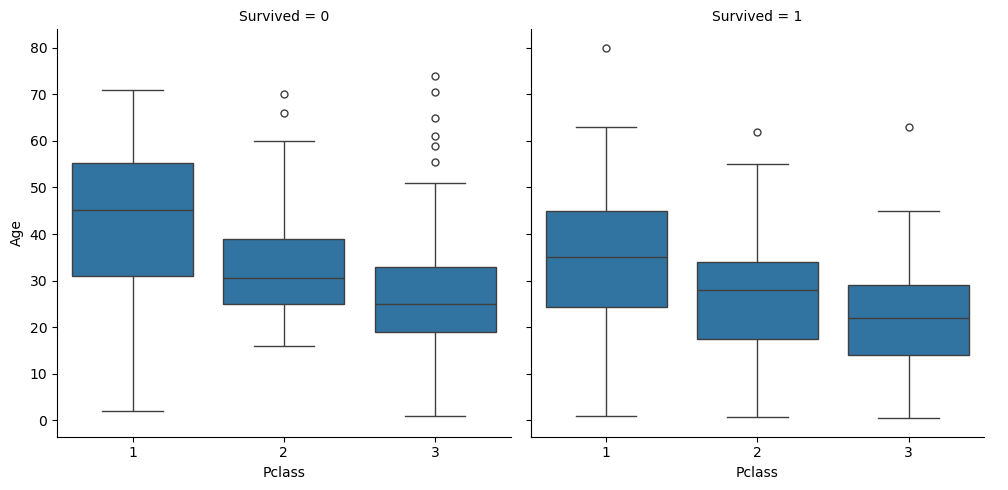

In [1372]:
sns.catplot(x="Pclass",y="Age",data=train,kind="box",col="Survived")

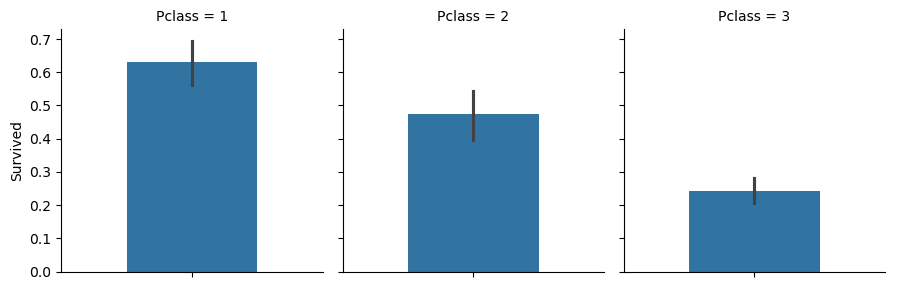

In [1373]:
sns.catplot(y="Survived",data=train,kind="bar",col="Pclass",height=3,width=0.5)

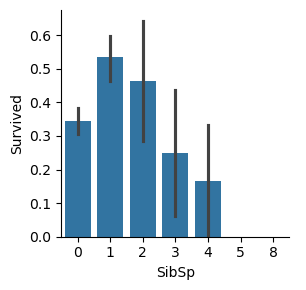

In [1374]:
 sns.catplot(x="SibSp",y="Survived",data=train,kind="bar",height=3)

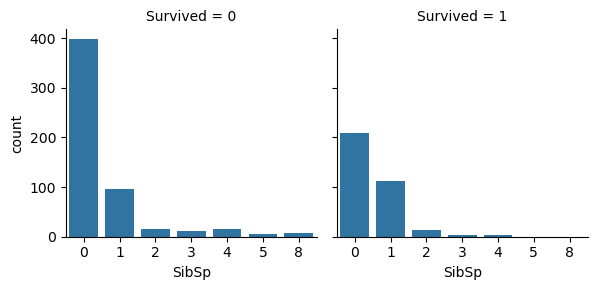

In [1375]:
 sns.catplot(x="SibSp",col="Survived",data=train,kind="count",height=3)

<Axes: xlabel='Age', ylabel='SibSp'>

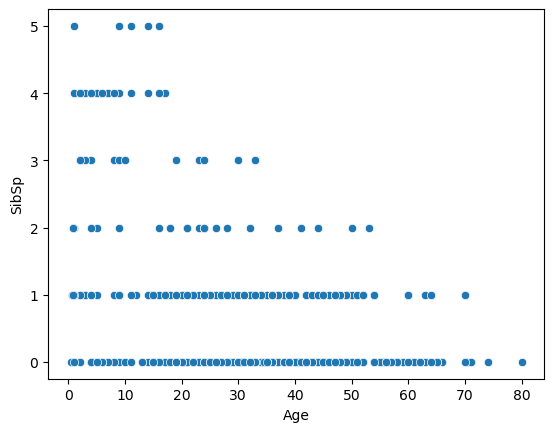

In [1376]:
sns.scatterplot(y="SibSp",x="Age",data=train)

In [1377]:
train.groupby(['Embarked']).agg({'Survived':'mean'})

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [1378]:
train.groupby(['Embarked']).agg({'Survived':'count'})

,Survived
Embarked,
C,168
Q,77
S,644


In [1379]:
train[train['Survived']==1]['Embarked'].value_counts()

Embarked
S    217
C     93
Q     30
Name: count, dtype: int64

In [1380]:
pd.crosstab([train.Sex,train.Survived],[train.Pclass],margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [1381]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1382]:
train.groupby(['Parch']).agg({'Survived':'mean'})

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [1383]:
pd.crosstab([train.Pclass,train.Embarked],[train.Sex,train.Survived],margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Pclass Embarked                           
1      C             1   42   25   17   85
       Q             0    1    1    0    2
       S             2   46   51   28  127
2      C             0    7    8    2   17
       Q             0    2    1    0    3
       S             6   61   82   15  164
3      C             8   15   33   10   66
       Q             9   24   36    3   72
       S            55   33  231   34  353
All                 81  231  468  109  889

###Transformation to features

In [1385]:
genders={"male":0,"female":1}
data=[train,test]
for dataset in data:
    dataset['Sex']=dataset['Sex'].map(genders)

In [1386]:
Embark={"S":0,"C":1,"Q":2}
data=[train,test]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(Embark)

In [1387]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [1388]:
data=[train,test]
for dataset in data:
    dataset['Fare']=dataset['Fare'].fillna(0)
    dataset['Fare']=dataset['Fare'].astype(int)

In [1389]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int32  
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 80.2+ KB


In [1390]:
dataset.Name.str.extract(' ([A-Za-z]+)\\.', expand=False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [1391]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\\.', expand=False)
    dataset['Title']=dataset['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'])
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [1392]:
data_train_test=pd.concat([train.assign(ind="train"),test.assign(ind="test")],ignore_index=True)

In [1393]:
age_nan_pos=data_train_test[data_train_test["Age"].isnull()].index
for i in age_nan_pos:
    mean_age=data_train_test["Age"][((data_train_test['Title'])==(data_train_test.iloc[i]['Title']))].mean()
    data_train_test.loc[i,'Age']=mean_age

In [1394]:
data_train_test[data_train_test['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ind


In [1395]:
data_train_test[data_train_test['Age']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ind


In [1396]:
train,test=data_train_test[data_train_test['ind']=='train'],data_train_test[data_train_test['ind']=='test']

In [1397]:
test[test['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ind


In [1398]:
data=[train,test]
for dataset in data:
    dataset.loc[:,'Age']=dataset['Age'].astype(int)
    dataset.loc[dataset['Age']<15,'Age']=0
    dataset.loc[(dataset['Age']>=15)&(dataset['Age']<30),'Age']=1
    dataset.loc[(dataset['Age']>=30)&(dataset['Age']<45),'Age']=2
    dataset.loc[(dataset['Age']>=45)&(dataset['Age']<60),'Age']=3
    dataset.loc[(dataset['Age']>=60),'Age']=4

In [1399]:
train.loc[:,'Age']=train.loc[:,'Age'].map(lambda x: int(x))

In [1400]:
test.loc[:,'Age']=test.loc[:,'Age'].map(lambda x:int(x))

In [1401]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int32  
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
 12  Title        891 non-null    int64  
 13  ind          891 non-null    object 
dtypes: float64(2), int32(1), int64(7), object(4)
memory usage: 100.9+ KB


In [1402]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ind
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7,NaN,0.0,1,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71,C85,1.0,3,train
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7,NaN,0.0,2,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53,C123,0.0,3,train
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8,NaN,0.0,1,train


test.info()

In [1404]:
train.drop(labels=['Ticket','Cabin','ind'],inplace=True,axis=1)
test.drop(labels=['Ticket','Cabin','ind'],inplace=True,axis=1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_68\326188819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(labels=['Ticket','Cabin','ind'],inplace=True,axis=1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_68\326188819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(labels=['Ticket','Cabin','ind'],inplace=True,axis=1)


In [1405]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,7,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,71,1.0,3
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,7,0.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,53,0.0,3
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,8,0.0,1


In [1406]:
data_train_test['Age']=data_train_test['Age'].astype(int)

In [1407]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    int32  
 9   Embarked     889 non-null    float64
 10  Title        891 non-null    int64  
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 80.1+ KB


In [1408]:
train.drop(labels=['Name'],axis=1,inplace=True)
test.drop(labels=['Name'],axis=1,inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_68\1545786396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(labels=['Name'],axis=1,inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_68\1545786396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(labels=['Name'],axis=1,inplace=True)


In [1409]:
test['Age']=test['Age'].astype(int)

C:\Users\Dell\AppData\Local\Temp\ipykernel_68\362228047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age']=test['Age'].astype(int)


In [1410]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 891 to 1781
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    int32  
 8   Embarked     889 non-null    float64
 9   Title        891 non-null    int64  
dtypes: float64(1), int32(2), int64(7)
memory usage: 69.6 KB


In [1411]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    int32  
 8   Embarked     889 non-null    float64
 9   Title        891 non-null    int64  
dtypes: float64(2), int32(1), int64(7)
memory usage: 73.1 KB


<Figure size 1500x500 with 0 Axes>

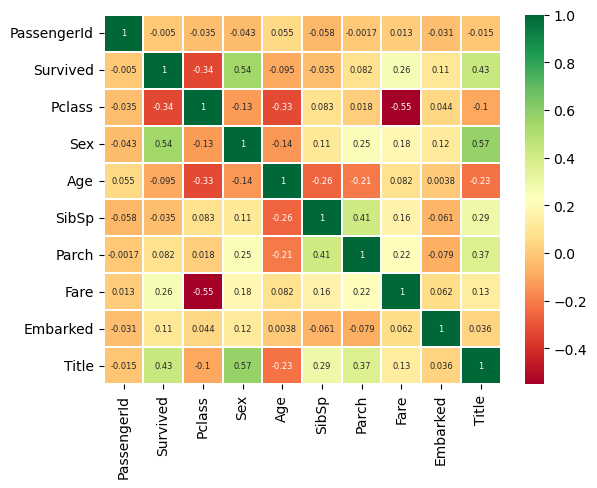

<Figure size 1500x500 with 0 Axes>

In [1412]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':6})
plt.figure(figsize=(15,5))

In [1413]:
data=[train,test]
for dataset in data:
    dataset['FamilySize']=dataset['Parch']+dataset['SibSp']+1

C:\Users\Dell\AppData\Local\Temp\ipykernel_68\2715334225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['FamilySize']=dataset['Parch']+dataset['SibSp']+1
C:\Users\Dell\AppData\Local\Temp\ipykernel_68\2715334225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['FamilySize']=dataset['Parch']+dataset['SibSp']+1


In [1414]:
train.drop(columns=['Parch','SibSp'],inplace=True)
test.drop(columns=['Parch','SibSp'],inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_68\356345692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=['Parch','SibSp'],inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_68\356345692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=['Parch','SibSp'],inplace=True)


In [1415]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,1,0,3,0,1.0,7,0.0,1,2
1,2,1,1,1,2.0,71,1.0,3,2
2,3,1,3,1,1.0,7,0.0,2,1
3,4,1,1,1,2.0,53,0.0,3,2
4,5,0,3,0,2.0,8,0.0,1,1


In [1416]:
train[['FamilySize','Survived']].groupby(['FamilySize']).agg(['count','mean','sum'])

Survived               
              count      mean  sum
FamilySize                        
1               537  0.303538  163
2               161  0.552795   89
3               102  0.578431   59
4                29  0.724138   21
5                15  0.200000    3
6                22  0.136364    3
7                12  0.333333    4
8                 6  0.000000    0
11                7  0.000000    0

<Figure size 1500x500 with 0 Axes>

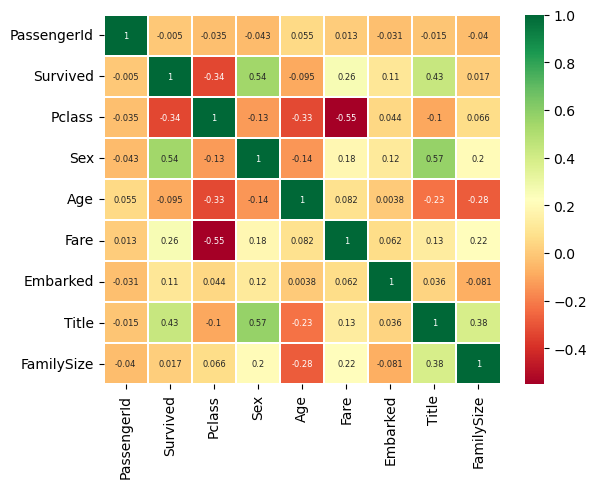

<Figure size 1500x500 with 0 Axes>

In [1417]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':6})
plt.figure(figsize=(15,5))

In [1418]:
data=[train,test]
for dataset in data:
    dataset['Age*Fare']=dataset['Age']*dataset['Fare']

C:\Users\Dell\AppData\Local\Temp\ipykernel_68\948866180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age*Fare']=dataset['Age']*dataset['Fare']
C:\Users\Dell\AppData\Local\Temp\ipykernel_68\948866180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age*Fare']=dataset['Age']*dataset['Fare']


In [1419]:
train.loc[:,['Survived','Age*Fare']]

,Survived,Age*Fare
0,0,7.0
1,1,142.0
2,1,7.0
3,1,106.0
4,0,16.0
...,...,...
886,0,13.0
887,1,30.0
888,0,23.0
889,1,30.0


In [1420]:
data=[train,test]
for dataset in data:
    dataset['Fare']=pd.cut(dataset['Fare'],13,labels=(np.arange(13)+1))

C:\Users\Dell\AppData\Local\Temp\ipykernel_68\3178141153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Fare']=pd.cut(dataset['Fare'],13,labels=(np.arange(13)+1))


In [1421]:
train['Fare'].unique()

[1, 2, 7, 4, 3, 13, 5, 6]
Categories (13, int32): [1 < 2 < 3 < 4 ... 10 < 11 < 12 < 13]

<Figure size 1500x500 with 0 Axes>

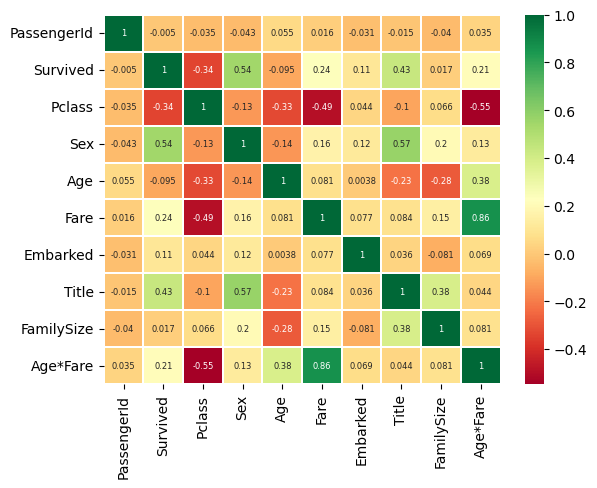

<Figure size 1500x500 with 0 Axes>

In [1422]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':6})
plt.figure(figsize=(15,5))

##Data Transformation

In [1424]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Age*Fare
0,1,0,3,0,1.0,1,0.0,1,2,7.0
1,2,1,1,1,2.0,2,1.0,3,2,142.0
2,3,1,3,1,1.0,1,0.0,2,1,7.0
3,4,1,1,1,2.0,2,0.0,3,2,106.0
4,5,0,3,0,2.0,1,0.0,1,1,16.0


In [1425]:
data=train.loc[:,['Age','Fare']]
data.head()

,Age,Fare
0,1.0,1
1,2.0,2
2,1.0,1
3,2.0,2
4,2.0,1


<Axes: ylabel='Age'>

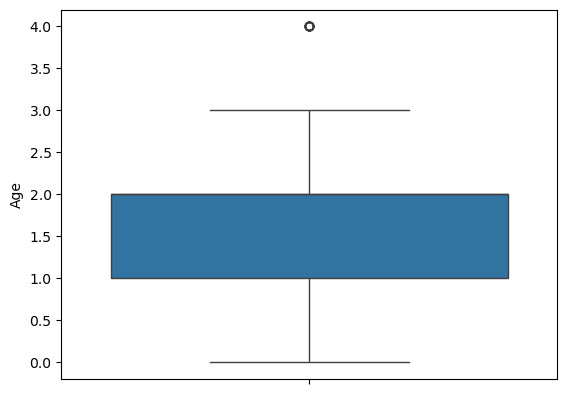

In [1426]:
sns.boxplot(data=data['Age'])

<Axes: xlabel='Age', ylabel='Count'>

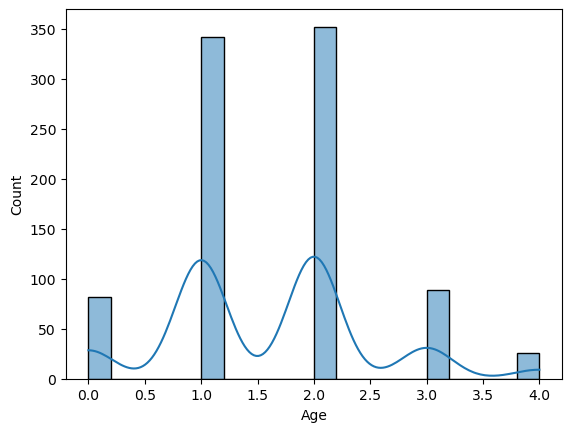

In [1427]:
sns.histplot(data['Age'],kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

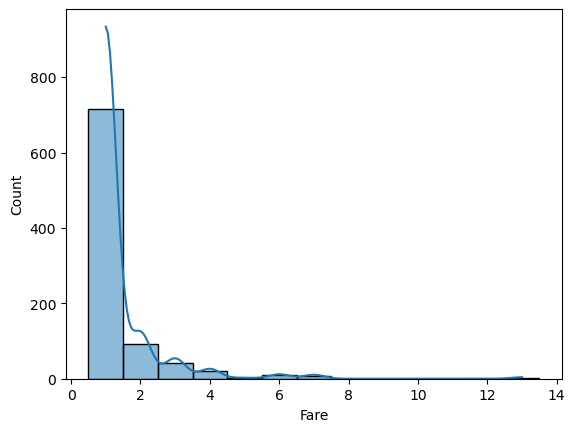

In [1428]:
sns.histplot(data['Fare'],kde=True)

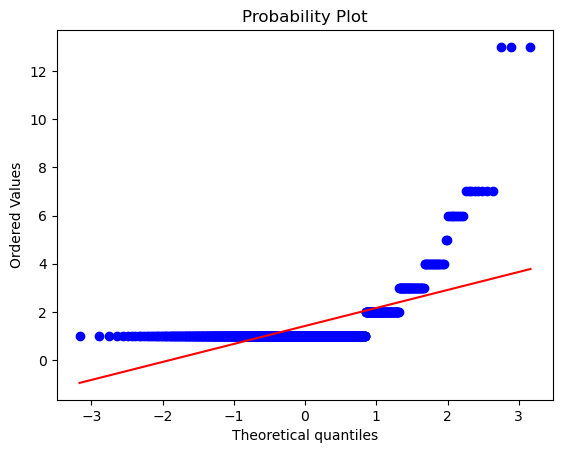

In [1429]:
#qq plot
plt.subplot()
stats.probplot(data['Fare'], plot=sns.mpl.pyplot)
plt.show()

In [1430]:
data.head()

,Age,Fare
0,1.0,1
1,2.0,2
2,1.0,1
3,2.0,2
4,2.0,1


In [1431]:
data['Age']=data['Age'].astype(int)

In [1432]:
data['Fare']=data['Fare'].astype(int)

In [1433]:
data['Age']=data['Age']+1
data['Fare']=data['Fare']+1

In [1434]:
data_log=np.log(data)

In [1435]:
data_log.head()

,Age,Fare
0,0.693147,0.693147
1,1.098612,1.098612
2,0.693147,0.693147
3,1.098612,1.098612
4,1.098612,0.693147


<Axes: xlabel='Fare', ylabel='Count'>

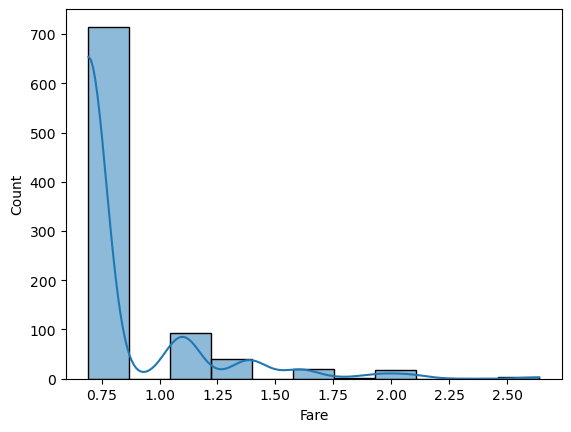

In [1436]:
sns.histplot(data_log['Fare'],kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

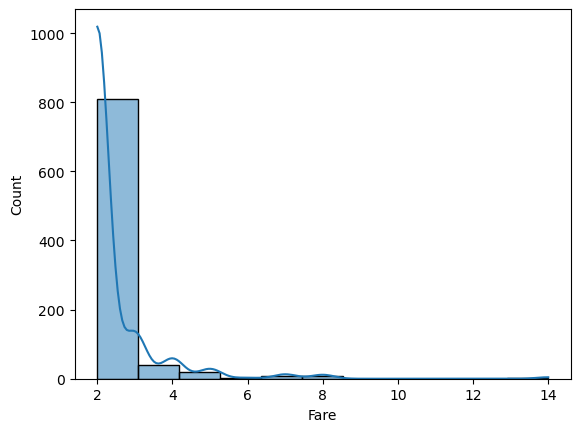

In [1437]:
sns.histplot(data['Fare'],kde=True)

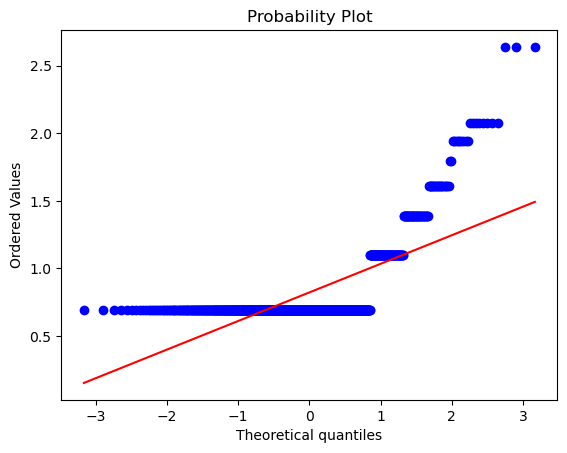

In [1438]:
plt.subplot()
stats.probplot(data_log['Fare'], plot=sns.mpl.pyplot)
plt.show()

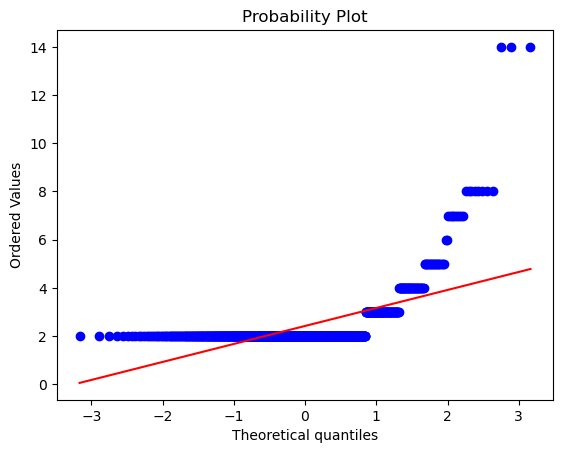

In [1439]:
plt.subplot()
stats.probplot(data['Fare'], plot=sns.mpl.pyplot)
plt.show()

<Axes: >

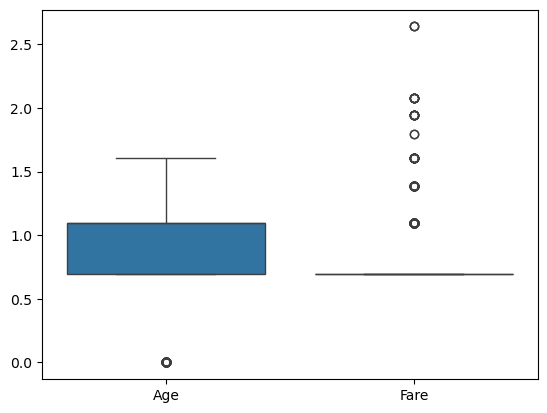

In [1440]:
sns.boxplot(data=data_log)

<Axes: >

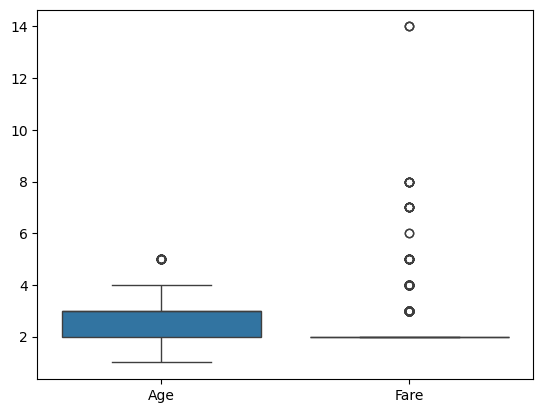

In [1441]:
sns.boxplot(data=data)

<Axes: xlabel='Age', ylabel='Count'>

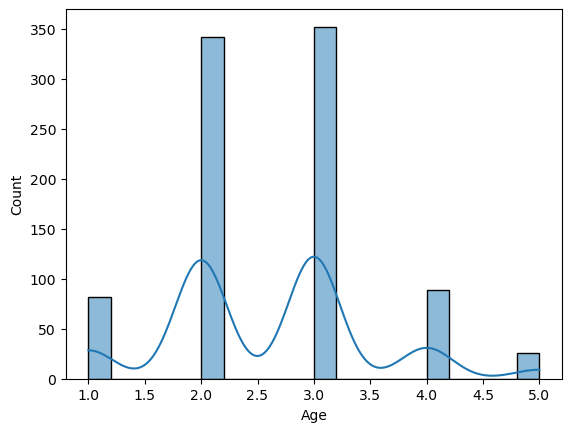

In [1442]:
sns.histplot(data['Age'],kde=True)

<Axes: xlabel='Age', ylabel='Count'>

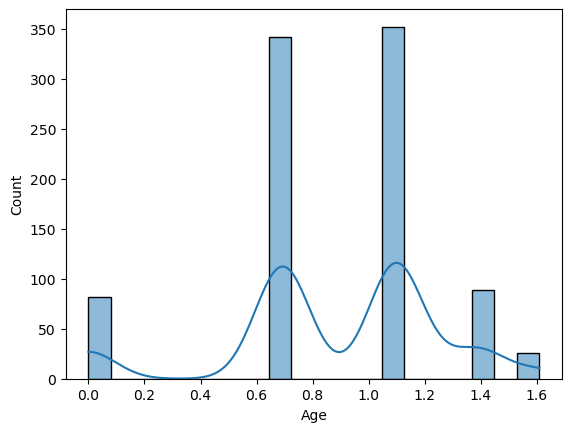

In [1443]:
sns.histplot(data_log['Age'],kde=True)

####Data Tranformation
1.Log Transformation
2.Exponent 
3.Square Root
4.Boxcox
5.Reciprocal

###One hot Encoding

In [1446]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Age*Fare
0,1,0,3,0,1.0,1,0.0,1,2,7.0
1,2,1,1,1,2.0,2,1.0,3,2,142.0
2,3,1,3,1,1.0,1,0.0,2,1,7.0
3,4,1,1,1,2.0,2,0.0,3,2,106.0
4,5,0,3,0,2.0,1,0.0,1,1,16.0


In [1447]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       2
Title          0
FamilySize     0
Age*Fare       0
dtype: int64

In [1448]:
frequent_port=train['Embarked'].dropna().mode()[0]
frequent_port

0.0

In [1449]:
train['Embarked']=train['Embarked'].fillna(frequent_port)

C:\Users\Dell\AppData\Local\Temp\ipykernel_68\319412647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Embarked']=train['Embarked'].fillna(frequent_port)


In [1450]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
FamilySize     0
Age*Fare       0
dtype: int64

In [1451]:
from sklearn.preprocessing import OneHotEncoder

In [1452]:
train_Embarked=train['Embarked'].values.reshape(-1,1)
test_Embarked=test['Embarked'].values.reshape(-1,1)

In [1453]:
onehot_encoder=OneHotEncoder(sparse_output=False)
train_OneHotEncoded=onehot_encoder.fit_transform(train_Embarked)
test_OneHotEncoded=onehot_encoder.fit_transform(test_Embarked)

In [1454]:
train['EmbarkedS']=train_OneHotEncoded[:,0]
train['EmbarkedS']=train_OneHotEncoded[:,0]
train['EmbarkedS']=train_OneHotEncoded[:,0]
test['EmbarkedS']=train_OneHotEncoded[:,0]
test['EmbarkedS']=train_OneHotEncoded[:,0]
test['EmbarkedS']=train_OneHotEncoded[:,0]

C:\Users\Dell\AppData\Local\Temp\ipykernel_68\2559806812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['EmbarkedS']=train_OneHotEncoded[:,0]
C:\Users\Dell\AppData\Local\Temp\ipykernel_68\2559806812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['EmbarkedS']=train_OneHotEncoded[:,0]
C:\Users\Dell\AppData\Local\Temp\ipykernel_68\2559806812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [1455]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Age*Fare,EmbarkedS
0,1,0,3,0,1.0,1,0.0,1,2,7.0,1.0
1,2,1,1,1,2.0,2,1.0,3,2,142.0,0.0
2,3,1,3,1,1.0,1,0.0,2,1,7.0,1.0
3,4,1,1,1,2.0,2,0.0,3,2,106.0,1.0
4,5,0,3,0,2.0,1,0.0,1,1,16.0,1.0


In [1456]:
from sklearn.model_selection import train_test_split

In [1457]:
x = train.drop(columns=['Survived'])
y = train['Survived']

In [1458]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [1459]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=60)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)

0.9975031210986267

In [1460]:
print("accuracy",model.score(x_test,y_test))

accuracy 0.8111111111111111


In [1461]:
#sex=pd.get_dummies(train['sex'],drop_first=True)